This example was taken from https://towardsdatascience.com/customer-segmentation-in-python-9c15acf6f945

Well, we can segment customers based on their buying behavior on the market.

+ Gather the data
+ Create Recency Frequency Monetary (RFM) table
+ Manage skewness and scale each variable
+ Explore the data
+ Cluster the data
+ Interpret the result

In [14]:
import pandas as pd

df= pd.read_excel("Online Retail.xlsx")

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
df.isna().sum() / df.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [16]:
df.shape

(541909, 8)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = df[df.CustomerID.notna()].copy()

In [20]:
df.shape

(406829, 8)

In [21]:
df_sample = df.sample(10000, random_state=42)

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


To segmenting customer, there are some metrics that we can use, such as when the customer buy the product for last time, how frequent the customer buy the product, and how much the customer pays for the product. We will call this segmentation as RFM segmentation.

In [23]:
# Convert to show date only
from datetime import datetime
df_sample["InvoiceDate"] = df_sample["InvoiceDate"].dt.date

# Create TotalSum colummn
df_sample["TotalSum"] = df_sample["Quantity"] * df_sample["UnitPrice"]

# Create date variable that records recency
import datetime
snapshot_date = max(df_sample.InvoiceDate) + datetime.timedelta(days=1)

# Aggregate data by each customer
customers = df_sample.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [24]:
customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,40,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,73,5,80.85
12354.0,233,2,33.30


In [33]:
customers.describe()

,Recency,Frequency,MonetaryValue
count,2690.000000,2690.000000,2690.000000
mean,110.934201,3.717472,73.625743
std,102.377871,7.176189,254.950467
min,1.000000,1.000000,-419.400000
25%,27.000000,1.000000,14.850000
50%,72.000000,2.000000,30.000000
75%,179.750000,4.000000,67.622500
max,374.000000,203.000000,6828.280000


C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

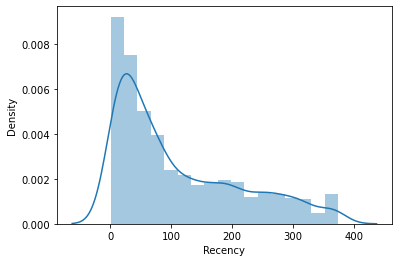

In [27]:
import seaborn as sns

sns.distplot(customers.Recency)

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Frequency', ylabel='count'>

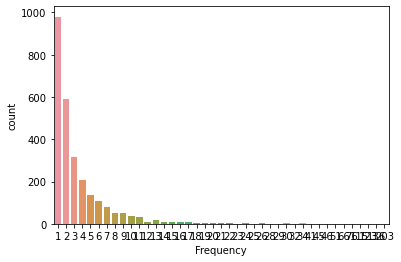

In [32]:
sns.countplot(customers.Frequency)

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

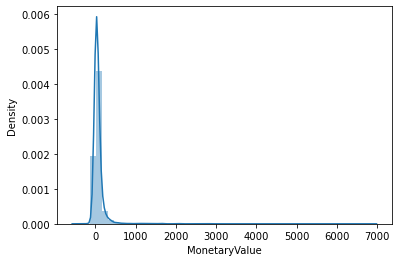

In [31]:
sns.distplot(customers.MonetaryValue)

The data should meet assumptions where the variables are not skewed and have the same mean and variance.

There are some methods that we can use to manage the skewness, they are,

+ log transformation
+ square root transformation
+ box-cox transformation

In [34]:
from scipy import stats

-0.10314757970383633


C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

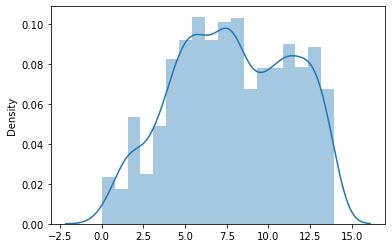

In [47]:
print(pd.Series(stats.boxcox(customers.Recency)[0]).skew())
sns.distplot(stats.boxcox(customers.Recency)[0])

-0.0010823655384821094


C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

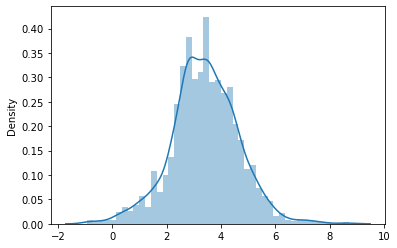

In [46]:
print(pd.Series(stats.boxcox(customers[customers.MonetaryValue > 0 ].MonetaryValue)[0]).skew())
sns.distplot(stats.boxcox(customers[customers.MonetaryValue > 0 ].MonetaryValue)[0])

In [41]:
customers[customers.MonetaryValue < 0 ].MonetaryValue.shape

(46,)

In [48]:
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
2685,7.832068,0.591193,3.408514
2686,1.269495,1.435599,5.907565
2687,4.288385,0.591193,-1.669108
2688,1.665555,1.615329,4.273206
2689,6.340700,1.017445,4.087250


We have to normalize it.

In [49]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()

# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)

# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[ 0. -0.  0.]
[1. 1. 1.]


## Modeling

To make our clustering reach its maximum performance, we have to determine which hyperparameter fits to the data. To determine which hyperparameter is the best for our model and data, we can use the elbow method to decide

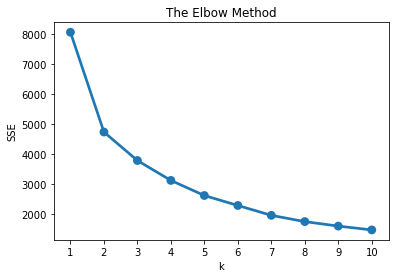

In [51]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
    
plt.title("The Elbow Method")
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [52]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(2690,)

In [54]:
customers["Cluster"] = model.labels_
customers.groupby("Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "MonetaryValue": ["mean", "count"]
}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         47.21      1.62         21.58   808
1        226.64      1.64         28.66   960
2         46.31      7.72        166.06   922

we can analyze the segments using snake plot. It requires the normalized dataset and also the cluster labels. By using this plot, we can have a good visualization from the data on how the cluster differs from each other. We can make the plot by using this code,

In [58]:
df_n = pd.DataFrame(customers_normalized, columns=["Recency", "Frequency", "MonetaryValue"])

df_n["ID"] = customers.index
df_n["Cluster"] = model.labels_


# Melt The Data
df_nor_melt = pd.melt(df_n.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,12347.0,2,Recency,-0.493794
1,12348.0,1,Recency,1.232949
2,12349.0,2,Recency,-0.994917
3,12352.0,2,Recency,-0.012582
4,12354.0,1,Recency,1.155005


In [61]:
df_nor_melt

,ID,Cluster,Attribute,Value
0,12347.0,2,Recency,-0.493794
1,12348.0,1,Recency,1.232949
2,12349.0,2,Recency,-0.994917
3,12352.0,2,Recency,-0.012582
4,12354.0,1,Recency,1.155005
...,...,...,...,...
8065,18265.0,0,MonetaryValue,0.052265
8066,18272.0,2,MonetaryValue,1.472436
8067,18274.0,0,MonetaryValue,-2.833266
8068,18283.0,2,MonetaryValue,0.543657


C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

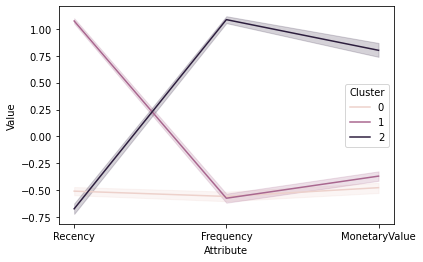

In [60]:
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

+ cluster 0: new customer
+ cluster 1: churned customers, less frequent, less spend, and they buy the product 
+ cluster 2: loyal customer
